In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("data.csv")
data['Date'] = pd.to_datetime(data['Date'])
data['Close/Last'] = pd.to_numeric(data['Close/Last'].replace('[\$,]', '', regex=True), errors='coerce')
data['Open'] = pd.to_numeric(data['Open'].replace('[\$,]', '', regex=True), errors='coerce')
data['High'] = pd.to_numeric(data['High'].replace('[\$,]', '', regex=True), errors='coerce')
data['Low'] = pd.to_numeric(data['Low'].replace('[\$,]', '', regex=True), errors='coerce')
data.dtypes

Company               object
Date          datetime64[ns]
Close/Last           float64
Volume                 int64
Open                 float64
High                 float64
Low                  float64
dtype: object

In [3]:
data = data.dropna()

In [4]:
data.drop('Company', axis=1, inplace=True)

In [5]:
data = data[::-1].reset_index(drop=True)

In [6]:
data

,Date,Close/Last,Volume,Open,High,Low
0,2013-07-18,38.0586,20418642,38.6157,38.6157,37.7143
1,2013-07-19,37.7966,18098750,38.2043,38.2784,37.5971
2,2013-07-22,37.4228,44791095,38.1214,38.3928,36.7314
3,2013-07-23,35.7514,76792963,35.9143,37.4621,35.1714
4,2013-07-24,34.4714,33395351,35.6743,36.0357,34.3143
...,...,...,...,...,...,...
25155,2023-07-11,188.0800,46638120,189.1600,189.3000,186.6000
25156,2023-07-12,189.7700,60750250,189.6800,191.7000,188.4700
25157,2023-07-13,190.5400,41342340,190.5000,191.1900,189.7800
25158,2023-07-14,190.6900,41616240,190.2300,191.1799,189.6300


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
data['Date'] = data['Date'].apply(lambda x: x.timestamp())

In [8]:
LRmodel = LinearRegression()
NNmodel = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, learning_rate_init=0.001)
RFmodel = RandomForestRegressor()

In [9]:
#split into input (X) and output (y)
X = data.iloc[:, [0,2,3,4,5]] # date, volume, open, high, low columns as input
y = data.iloc[:, 1] # close/last price as output

In [10]:
#split into training and testing
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y, test_size = 0.3, random_state = 1)
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

In [11]:
#train models
LRmodel.fit(Xtrain, Ytrain)
NNmodel.fit(Xtrain_scaled, Ytrain)
RFmodel.fit(Xtrain, Ytrain)

RandomForestRegressor()

In [12]:
print(LRmodel.score(Xtest,Ytest))
print(NNmodel.score(Xtest_scaled,Ytest))
print(RFmodel.score(Xtest,Ytest))

0.9998059937408583
0.9997910025382678
0.9997525865021708


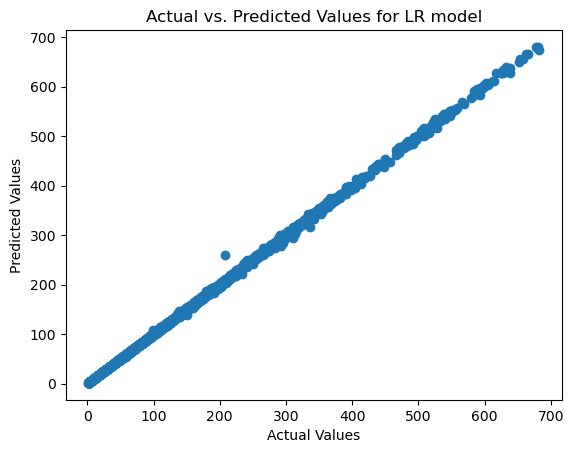

In [13]:
# plot values for Linear Regression model
import matplotlib.pyplot as plt

predicted_values = LRmodel.predict(Xtest)

plt.scatter(Ytest, predicted_values)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for LR model')
plt.show()

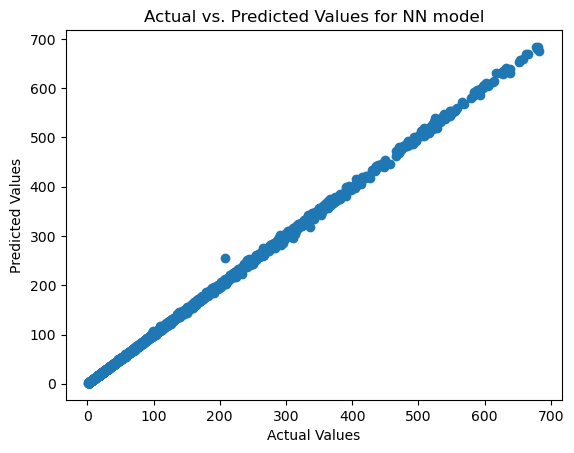

In [14]:
#plot values for neural network model

predicted_values = NNmodel.predict(Xtest_scaled)

plt.scatter(Ytest, predicted_values)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for NN model')
plt.show()

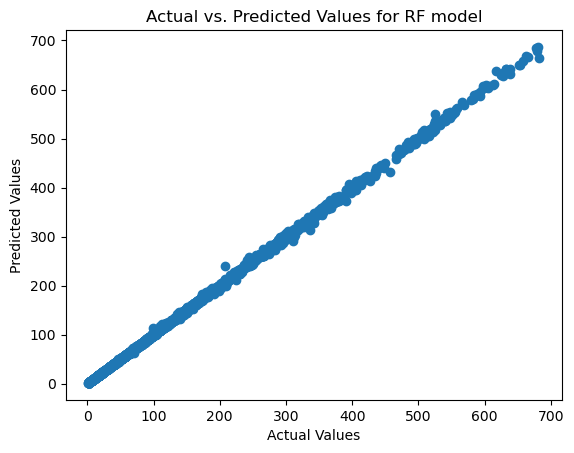

In [15]:
#plot values for random forests model

predicted_values = RFmodel.predict(Xtest)

plt.scatter(Ytest, predicted_values)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for RF model')
plt.show()